# Student Performance Analysis
### _Understanding the role of privilege and preparation on exam performance_
<!-- <span style="color:#83898b">*Understanding the role of passenger class on survival*</span> -->
**Aurodeep Saha**

**100928622**

Sometimes, understanding how students learn begins not in a classroom, but in the patterns hidden inside their data. Someone by the name of Aliza Brand, a datasets expert on Kaggle, had collected data on school students in the city of Lahore, Pakistan. The data she had recorded from the participants included their gender, their race/ethnicity, the level of education of their parents, their lunch accommodations, whether they took the test preparation course, and their exam scores on mathematics, reading, and writing. The data collection process took place from January 1st, 2023, to December 31st, 2024. Aliza's purpose for recording said data was inspired by studies that analyze how social and educational factors affect academic outcomes. There was also a bigger picture in mind as she wanted to provide this data to people online so that they could use it for data analysis, visualization, and machine learning projects such as predicting student success or exploring education trends. I’m one of those people who want to use this data to conduct data analysis to showcase how these factors can influence how students perform in their school examinations, specifically their privileges and preparation. This question interests me because I want to dive deep into the many different factors that can shape a student’s educational performance as this is something that I can resonate to with in my past or even the present. For this project, I used the Student Performance Analysis dataset from [Kaggle](https://www.kaggle.com/datasets/alizabrand/school-performance-analysis/data)

![Student Studying](https://storage.googleapis.com/kaggle-datasets-images/8721799/13710021/15096bdba9ce7aeeaaf4b12679e433cb/dataset-cover.jpg?t=2025-11-13-04-07-32)
##### *Image source: https://www.kaggle.com/datasets/alizabrand/school-performance-analysis/data*

## Methods
### Data Collection

Imported standard python libraries for data handling, analysis, and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

A subset of data from the Students is maintained publicly at [Kaggle](https://www.kaggle.com/work/datasets), a free online resource of general datasets.

In [2]:
# Load data
studentperf = pd.read_csv('StudentsPerformance.csv')

### Data Cleaning

The student performance dataset has a race/ethnicity column which is not my data analysis focus so I will be removing it. The parental level of education column had answers "some high school" and "high school" which mean the same thing so I will be combining the two into "high school".

In [3]:
# Removing the race/ethnicity column as it is not needed for the analysis
if 'race/ethnicity' in studentperf.columns:
    studentperf.drop(columns=['race/ethnicity'], inplace=True)

# Dict-like replace to simplify parental level of education categories
studentperf = studentperf.replace({'parental level of education': {'some high school': 'high school'}}).infer_objects(copy=False)

Checking the types of values the dataset has.

In [4]:
# Check for missing values
studentperf.isnull().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Display dataset info
studentperf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


There is no missing or unwanted data remaining so we can confidently proceed to the analysis.

## Analyses
I will explore the relationships between parental level of education, test preparation course, and lunch accommadations on exam scores with exploratory analyses, consisting of statistical summaries and visualisations.

### Distributions
I will begin by exploring distributions in our Student Performance data. Figure below shows the distribution of parental level of education of students. The parental levels recorded from the students ranged from high school, some college, associate's degree, bachelor's degree, and master's degree. As we can see, the majority of parents have high school as their highest level of education.

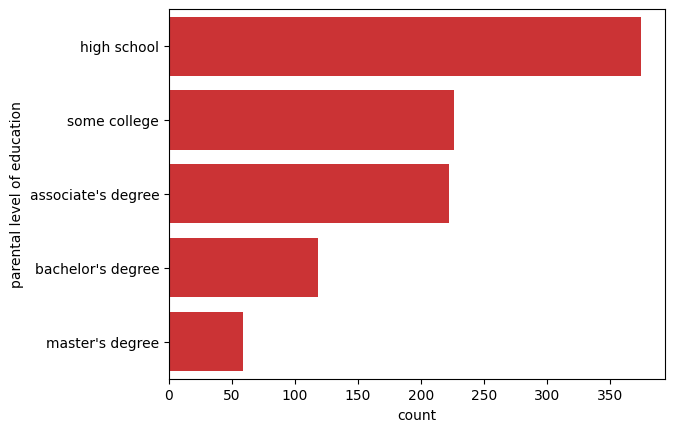

In [6]:
# Distribution of parental level of education
# Reversed the x and y axes to make the labels more readable
# Also ordered the bars by frequency
sns.set_palette("Set1")
h = sns.countplot(data=studentperf, y='parental level of education', order=studentperf['parental level of education'].value_counts().index)

If I were to rank the parental levels of education (high school being 1, some college being 2, associate's degree being 3, bachelor's degree being 4, and master's degree being 5), I can do a descriptive analysis revealing the levels of educational support the students may have received. Below you can see that the mean level was around 2.26, meaning the average parental level of education is close to some college. This is the average level a student is receiving support from. The min parental level is 1, which basically means high school level, and the max level is 5, which basically means master's degree. These are shown just to put into prespective what the average level students are exposed to. Mean being 2.26 which is less than the middle level of 2.5 just signifies that the parental level of education the average student is receiving support from is closer to the lower ends, thus highlighting that majority of the students are not priviliged enough to receive proper support and it reflects on their exam scores.

In [7]:
# Descriptive statistics of parental level of education
studentperf['parental level numeric'] = studentperf['parental level of education'].astype(str).map({"high school": 1, "some college": 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})
ds = studentperf['parental level numeric'].describe()
print(f"Mean level: {round(ds['mean'],2)}")
print(f"Max level: {round(ds['max'])}")
print(f"Min level: {round(ds['min'])}")

Mean level: 2.26
Max level: 5
Min level: 1


Next I show the distribution of students who completed the test preparation course. From the countplot in Figure 2, we can see that there were a greater proportion of students who did not complete the test preparation course than the ones who did.

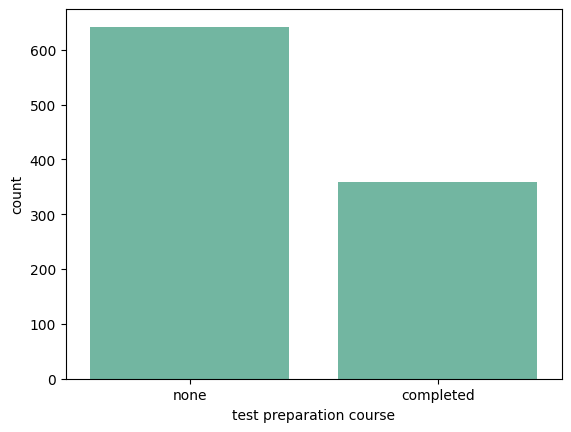

In [8]:
# Distribution of test preparation course completion
sns.set_palette("Set2")
h2 = sns.countplot(x = studentperf["test preparation course"])

The dataset had students with two types of different lunch accommodation. Figure 3 below shows that majority of the students had a standard lunch, but not too far trailing behind are the amount of students who had either free or reduced lunch.

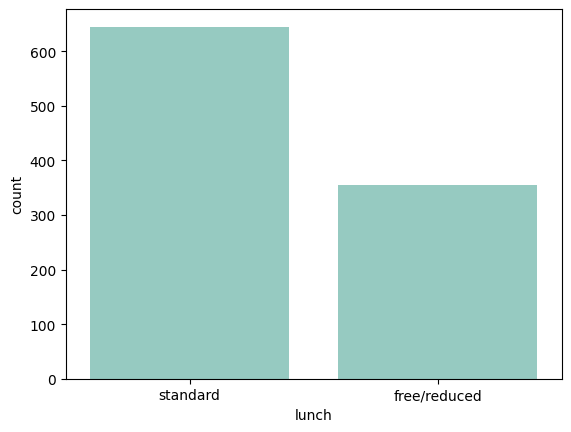

In [9]:
# Count plot
sns.set_palette("Set3")
h3 = sns.countplot(x = studentperf.lunch)

Below I have made histgrams of the exam scores of math, reading, and writing. Majority of students scoring a C (60-69) in math, and majority of students scoring a B (70-79) in reading and writing.

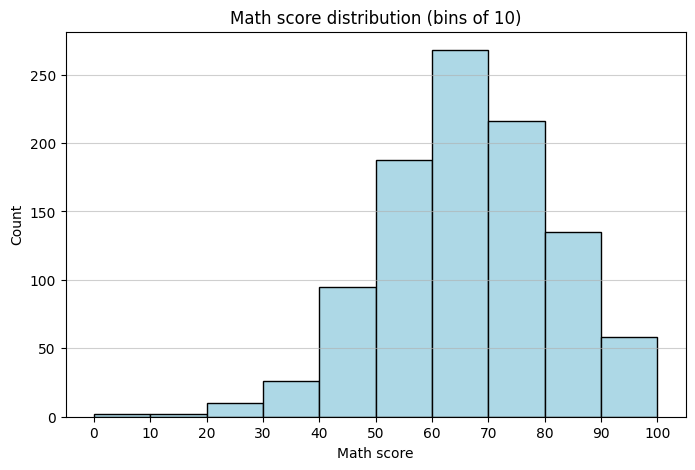

In [10]:
# Matplotlib histogram for Math scores
bins = np.arange(0, 101, 10)
plt.figure(figsize=(8,5))
plt.hist(studentperf['math score'], bins=bins, color="lightblue", edgecolor='black')
plt.xticks(bins)
plt.xlabel('Math score')
plt.ylabel('Count')
plt.title('Math score distribution (bins of 10)')
plt.grid(axis='y', alpha=0.6)
plt.show()

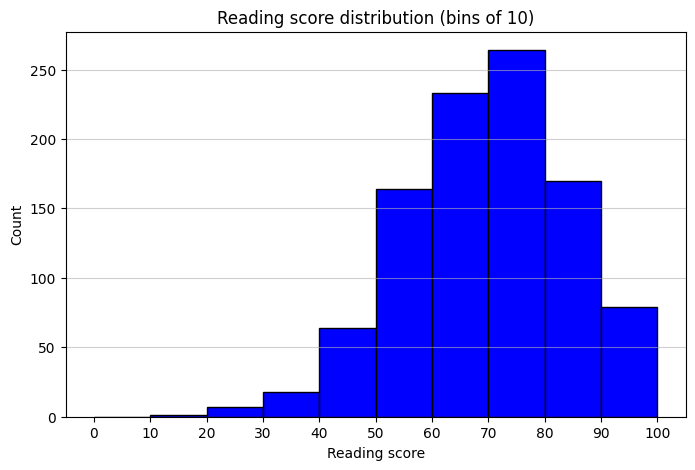

In [11]:
# Matplotlib histogram for Reading scores
plt.figure(figsize=(8,5))
plt.hist(studentperf['reading score'], bins=bins, color="blue", edgecolor='black')
plt.xticks(bins)
plt.xlabel('Reading score')
plt.ylabel('Count')
plt.title('Reading score distribution (bins of 10)')
plt.grid(axis='y', alpha=0.6)
plt.show()

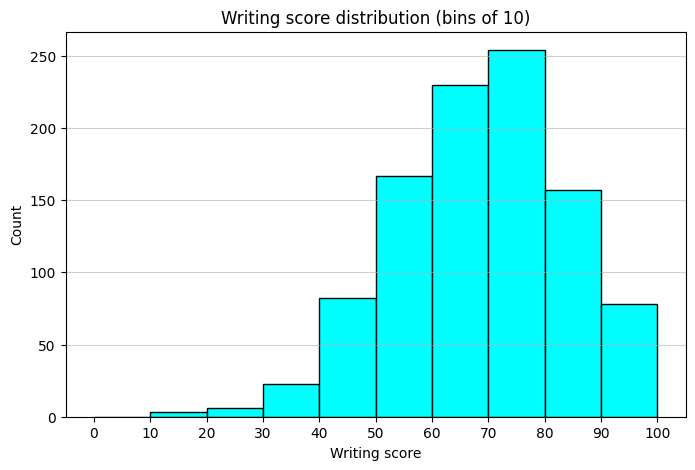

In [12]:
# Matplotlib histogram for Writing scores
plt.figure(figsize=(8,5))
plt.hist(studentperf['writing score'], bins=bins, color="cyan", edgecolor='black')
plt.xticks(bins)
plt.xlabel('Writing score')
plt.ylabel('Count')
plt.title('Writing score distribution (bins of 10)')
plt.grid(axis='y', alpha=0.6)
plt.show()

### Test Preparation Course Completion and Average Exam Scores ###
An examination of test preparation course completion, and average exam scores in math, reading, and writing revealed an interesting pattern as you can see below.

In [13]:
# Focusing on test preparation course completion and average exam scores
print(f"Avg math score for students with completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='completed','math score'].mean(),2)}")
print(f"Avg math score for students without completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='none','math score'].mean(),2)}\n")
print(f"Avg reading score for students with completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='completed','reading score'].mean(),2)}")
print(f"Avg reading score for students without completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='none','reading score'].mean(),2)}\n")
print(f"Avg writing score for students with completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='completed','writing score'].mean(),2)}")
print(f"Avg writing score for students without completed test prep course: {round(studentperf.loc[studentperf['test preparation course']=='none','writing score'].mean(),2)}")

Avg math score for students with completed test prep course: 69.7
Avg math score for students without completed test prep course: 64.08

Avg reading score for students with completed test prep course: 73.89
Avg reading score for students without completed test prep course: 66.53

Avg writing score for students with completed test prep course: 74.42
Avg writing score for students without completed test prep course: 64.5


The average math score for students who have completed the test preparation course was a little higher (~5) than the ones who did not complete it. The average reading score for students who have completed the test preparation course seem to also be a little higher (~7) than the ones who did not complete it. The impact of the test preparation course completion is significantly higher for writing score average as compared to the reading and math score. The average writing score for students with the test preparation course complete seem to be a lot higher (~10) than the ones who did not complete it. Overall, whether students completed the test preparation course or not seems to have a crucial role on all three exam scores, for some exams the effect being higher than others.

### Lunch Accommodations and Average Exam Scores ###
It was documented that students had different types of lunch accommodations. Lets see how this can influence a students exam scores.

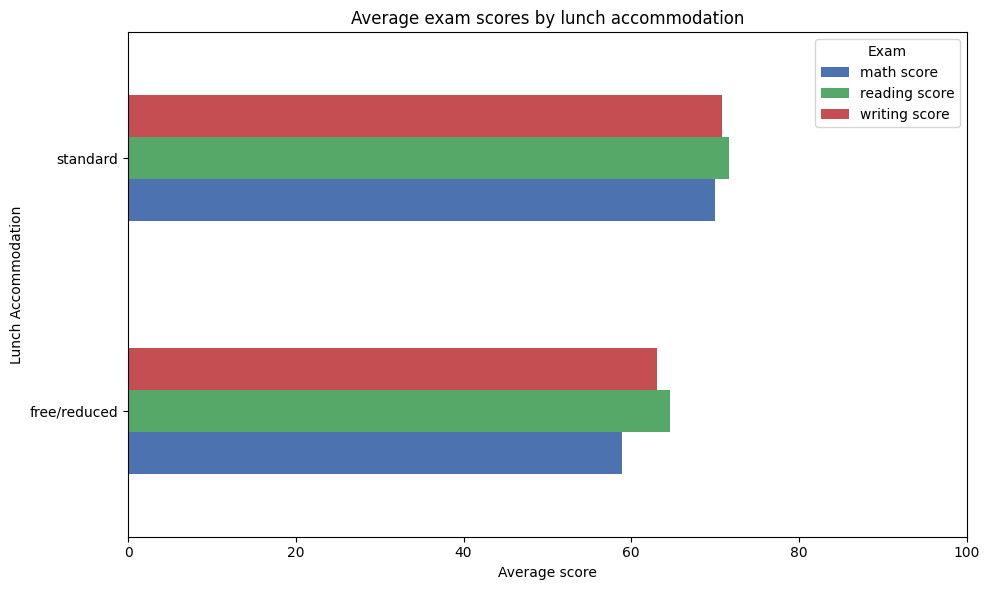

In [14]:
# Show average math, reading, and writing scores for each type of lunch accommodation (grouped horizontal bars)
lunch_mean = studentperf.groupby('lunch', observed=True)[['math score','reading score','writing score']].mean()
ax = lunch_mean.plot(kind='barh', figsize=(10,6), color=['#4C72B0', '#55A868', '#C44E52'])
ax.set_xlabel('Average score')
ax.set_ylabel('Lunch Accommodation')
ax.set_xlim(0, 100)
ax.set_title('Average exam scores by lunch accommodation')
ax.legend(title='Exam')
plt.tight_layout()
plt.show()

The graph clearly shows a difference in exam scores for math, reading, and writing based on the students lunch accommodation. The students who have a standard lunch consistently scored higher on average in all three subjects compared to the students with a free/reduced lunch. This suggests a positive correlation between students who have a standard lunch status and higher average exam scores. It also highlights the significant achievement gap for students who are likely from a lower-income background, which may result in a free/reduced lunch status. This can commonly attribute to differences in available resources, educational support at home, and other factors linked to socioeconomic status.

In [15]:
# Display the lunch accommadation on exam scores statistics
print(lunch_mean.round(2))

              math score  reading score  writing score
lunch                                                 
free/reduced       58.92          64.65          63.02
standard           70.03          71.65          70.82


Looking at the numerical statistics, it seems like the gap is largest in the math score, where students with a standard lunch tend to score approximately 10% higher on average than the students with a free/reduced lunch. The gaps in reading and writing scores are slightly smaller in comparison to math, showing a difference of around 7%. We can correlate the math score gap for students being noticeably larger to the difference in home resources and educational support. Since the students with free/reduced lunch accommodations could be due to them being from a lower socioeconomic status background, they may have missed key foundational concepts early on due to less formal educational stimulation at home. Math skills such as the conceptual understanding are highly cumulative and build directly on prior knowledge and so this deficiency can rapidly widen as the curriculum progresses to more complex topics. Reading and writing is also cumulative, but children can be exposed to language and basic literacy skills by a variety of everyday activities such as conversations, signs, and even media. The home environment should provide a higher baseline level of these skills than mathematical skills.

### Parental Level of Education and Average Exam Scores ###
An examination of parental level of education, and average exam scores in math, reading, and writing can be shown below. These graphs revealed a clear influence the parental level of education has played towards the student's exam scores.

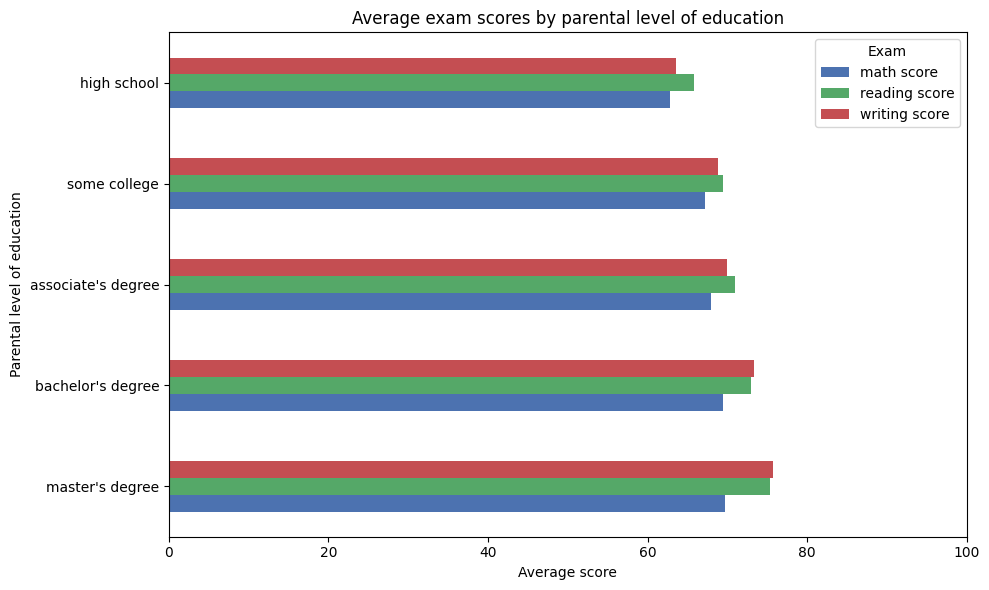

In [16]:
# Show average math, reading, and writing scores for each parental level (grouped horizontal bars)
parents_mean = studentperf.groupby('parental level of education', observed=True)[['math score','reading score','writing score']].mean().reindex(["master's degree", "bachelor's degree", "associate's degree", "some college", "high school"])
ax = parents_mean.plot(kind='barh', figsize=(10,6), color=['#4C72B0', '#55A868', '#C44E52'])
ax.set_xlabel('Average score')
ax.set_ylabel('Parental level of education')
ax.set_xlim(0, 100)
ax.set_title('Average exam scores by parental level of education')
ax.legend(title='Exam')
plt.tight_layout()
plt.show()

This grouped bar graph shows just how a students exam scores, may it be for math, reading, or writing, can greatly improve the higher their parents level of education is. All three student exam scores seem to be follow the same trend. The students whose parental level of education is only up to high school can be seen to have a noticeably lower average. As the students parental level of education increases, the average exam scores increase less and less, making the average comparisons between the previous levels insignificant. This speaks volumes of how support and the level of it can play a key part in a students academic journey. Not everyone can be privileged enough to receive rich support in their household, causing them to struggle more than others and reflecting those results in their exam scores. Students whose parents education is up to master's degree average in the highest exam scores, which makes sense as they may be receiving support from the highest level of education.

The Line chart below shows a more clear depiction of how the exam score averages are the lowest at the parental level of education of high school, and it increases as it goes higher up in levels until master's degree.

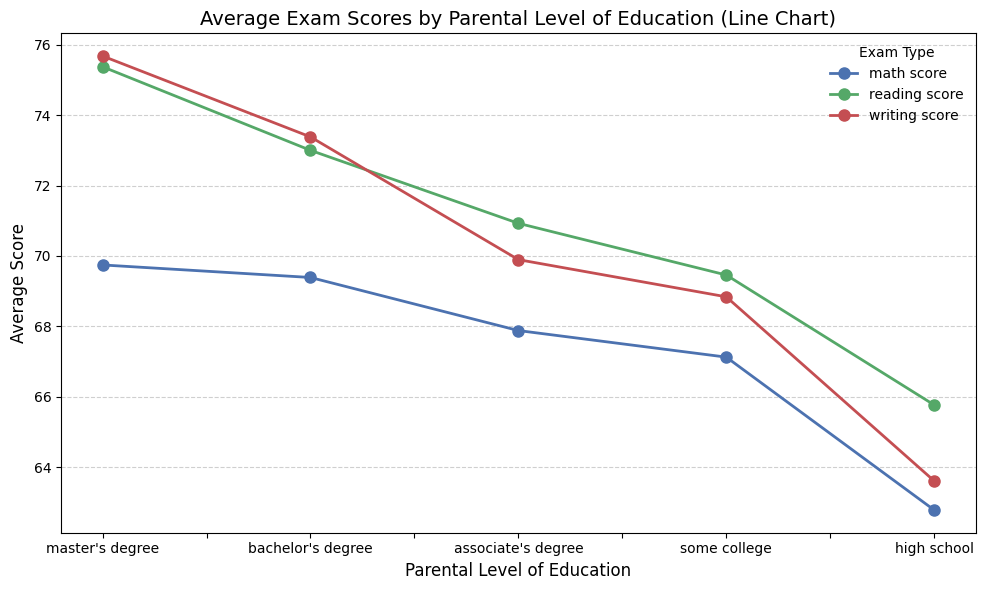

In [17]:
# Show average math, reading, and writing scores for each parental level (line chart)
fig, ax = plt.subplots(figsize=(10, 6))
parents_mean.plot(kind='line', ax=ax, marker='o', markersize=8, linewidth=2, color=['#4C72B0', '#55A868', '#C44E52'])
ax.set_xlabel('Parental Level of Education', fontsize=12)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_title('Average Exam Scores by Parental Level of Education (Line Chart)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(title='Exam Type', frameon=False)
plt.tight_layout()
plt.show()

In [18]:
# Display the parental level of education on exam scores statistics
print(parents_mean.round(2))

                             math score  reading score  writing score
parental level of education                                          
master's degree                   69.75          75.37          75.68
bachelor's degree                 69.39          73.00          73.38
associate's degree                67.88          70.93          69.90
some college                      67.13          69.46          68.84
high school                       62.79          65.77          63.61


In this table we can see the numerical values of the average test scores grouped based on the parental level of education. Students whose parent's have an education level up to high school achieve an average of low C grade in math and writing scores, and mid C in reading. As the parental level of education goes up, so does the exam scores. With some college education level, students average high C grade for all three of the exams. There was an around 4% increase in student exam scores for math and reading, and close to 6% increase in writing scores. Then if we look at the difference between associate's degree and some college, the gap is not so big as its only around 1% increase. The difference between bachelor's degree and associate's degree being 2-3%. Finally the difference between bachelor's degree and master's degree being around 2% for reading and writing scores but only about 0.3% for math. 

Looking at the numerical differences, the jump from high school to some college level of education stands out to be the largest. The gap of average exam scores between parental education levels decreases as we go higher up in levels. This may suggest that most parents with no post-secondary education may not be able to support their kids as much as the higher levels can. The parents who have some college level of education and higher may have provided their children with the additional skills, habits, or resources that can have a positive influence over their children's academic outcomes. This can explain the gap getting smaller in the higher levels of education, suggesting that there can be less and less new learnings that could be helpful in being utilised to support the children in their school.

## Discussion ##

In this assignment, I explored data from the student performance dataset, and focused on relationships between students parental level of education, lunch accommodations, and test preparation course completion on their exam scores for math, reading, and writing. An exploratory analysis supported the hypotheses that all three of these factors were related to the students exam performance. I found that the students whose parents only had an education level up to high school had substantially lower exam scores for math, reading, and writing than the students whose parents had a higher education level (some college, associate's degree, bachelor's degree, master's degree). The exam score averages got better and better the higher the level. Similarly, students who had completed the test preparation course had noticeably higher exam score averages than the students who did not complete it. Additionally, the students who had standard lunch accommodations did significantly better in their exams than the students who had free/reduced lunch. These analyses confirm widely reported trends on how various factors can influence a students academic performance. Test preparation course completion questions whether the student was motivated and ready enough for the exams. The parental level of education revealed how the amount and quality of support in their respected households can effectively support the academic success for students. Lunch accommodations uncovered how the quality of the meal could reflect the socioeconomic status of the students and thus showcase how the lack of home resources and educational support may have caused them to miss key concepts that could have greatly helped them perform in their exams. All these factors correlate to a students academic journey and so it is crucial to have a fair system that helps students succeed and gives them all a fair ground to learn. Some may be more privileged than others and so we should provide the students in need with the proper support.

## GenAI Disclosure

This section discloses how Generative AI (ChatGPT and Google Gemini) were used to aid me structure certain parts of my code.

### **Description of Usage**

I used ChatGPT and Google Gemini in the following cases:
- **Troubleshooting errors in my code**
    * I was receiving an error in my code when I tried to run the part of the code where I removed the race/ethnicity column multiple times so I went to ChatGPT for suggestions.
    * I was receiving a FutureWarning for using `.replace()` as it would be removed in a future version so I asked ChatGPT for fixes.

- **Data Modeling**
    * I was a little unsure on the structure of histograms so I went to Google Gemini for help.

- **Data Visualizations Analysis**
    * I used Google Gemini to help expand my already existing analysis on the graphs.

### **Prompts Used**

Examples of prompts that I used for this report include:
* "Why am I getting an error like this: [insert error] for the following code: [insert code]"
* "How do I stop this code [insert code] from outputing the following warning message [insert warning]"
* "Give me example codes in Python on histgram and bar graphs using matplotlib"
* "How do I change the color of the graph?"
* "Expand on my analysis for the graph I've attached [insert current analysis] [attach image of graph]"

These prompts helped me improve my analysis, some results being more helpful than others as the next section explains.

### **Examples of Accepted vs. Rejected AI Suggestions**

**Accepted AI Suggestions**
* Suggested I use the code to remove the race/ethnicity column inside of an if statement to avoid outputting errors after rerunning the code
* Suggested I use mapping instead of `.replace()` to avoid receiving the FutureWarning which is a concept I'm fimiliar with
* Gave example codes of proper histogram and bar graphs that I used as inspiration to make my own
* Provided the method to change the color of my graphs
* Provided a concise understanding of my graphs from which I took a few key points and applied it into my analysis

**Rejected Ai Suggestions**
* Provided a jumble of replacement code for `.replace()` that was too big in quantity and too advanced for me to understand
* Provided an explaination of my graphs that was leaning away from the main focus of my analysis focusing on different factors

### **Evidence of Testing Suggestions**

I made sure to review, test, and revise the AI-enerated suggestions through:
* Checking each line of suggested code for errors
* Making sure the example code of graphs used concepts I was fimiliar with and where covered in class
* Proof-reading the expanding of my analysis of graphs to make sure it did not get side tracked
* Simplifying the analysis it provided to not be too language heavy

## References
1. Source data - https://www.kaggle.com/datasets/alizabrand/school-performance-analysis?resource=download
2. Pandas for data manipulation. ([documentation](https://pandas.pydata.org/docs/))
3. Seaborn for data visualization. ([documentation](https://seaborn.pydata.org/))
4. Matplotlib for data visualization. ([documentation](https://matplotlib.org/stable/contents.html))
5. [Google Gemini](https://gemini.google.com/app)
6. [ChatGPT](https://chatgpt.com/)